In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scale = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scale, val_scale, train_target, val_target = train_test_split(train_scale, train_target, test_size=0.2, random_state=42)

# 합성곱 신경망 만들기
## kernel_size : 마스크 크기

In [7]:
print(train_scale.shape, train_target.shape)
print(val_scale.shape, val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


In [24]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [25]:
model.add(keras.layers.MaxPooling2D(2))

In [26]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [27]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

# 모델 컴파일과 훈련

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scale, train_target, epochs=20, validation_data=(val_scale, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.5493 - accuracy: 0.8031 - val_loss: 0.3471 - val_accuracy: 0.8748
Epoch 2/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.3614 - accuracy: 0.8725 - val_loss: 0.3007 - val_accuracy: 0.8863
Epoch 3/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.3089 - accuracy: 0.8894 - val_loss: 0.2649 - val_accuracy: 0.8982
Epoch 4/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2726 - accuracy: 0.9021 - val_loss: 0.2380 - val_accuracy: 0.9123
Epoch 5/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2455 - accuracy: 0.9107 - val_loss: 0.2333 - val_accuracy: 0.9115
Epoch 6/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2283 - accuracy: 0.9164 - val_loss: 0.2280 - val_accuracy: 0.9149
Epoch 7/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2078 - accuracy: 0.9245 - val_loss: 0.2305 -

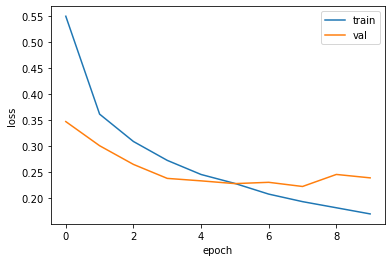

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [35]:
model.evaluate(val_scale, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2225 - accuracy: 0.9197


[0.22248832881450653, 0.9196666479110718]

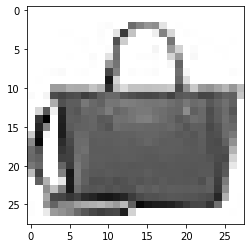

In [36]:
plt.imshow(val_scale[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [37]:
preds = model.predict(val_scale[0:1])
print(preds)

1/1 [==============================] - 0s 92ms/step
[[2.1652156e-19 6.6396030e-28 1.3342088e-21 3.2198512e-21 3.4374819e-19
  1.0558181e-18 7.7616845e-20 9.6889071e-21 1.0000000e+00 2.1809659e-19]]


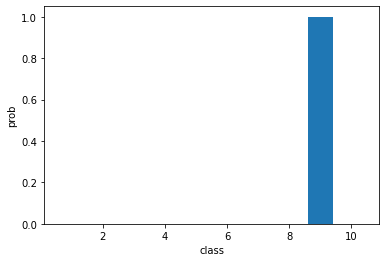

In [40]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [1]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [2]:
classes

['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [44]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [45]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [46]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2429 - accuracy: 0.9156


[0.24285683035850525, 0.9156000018119812]